In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [5]:
import statsmodels.api as sm

The random function generates a uniform distribution of 100 random (uncorrelated) numbers between 0 and 1. The mean of these numbers is (0+1)/2=0.5. If i multiply the series by 2 and substract 1 then the mean of the series is 0 2*0.5-1. So we have a seires of unocrrelated values with mean 0 so this is white nise according to the definition.

In [6]:
white_noise = 2*np.random.random((100,1)) - 1

In [7]:
white_noise=pd.DataFrame(white_noise)
white_noise.head()

,0
0,-0.658524
1,-0.851821
2,-0.909270
3,-0.164507
4,-0.772991


In [8]:
white_noise.rename(columns = {0:'WN'}, inplace = True)

<AxesSubplot:>

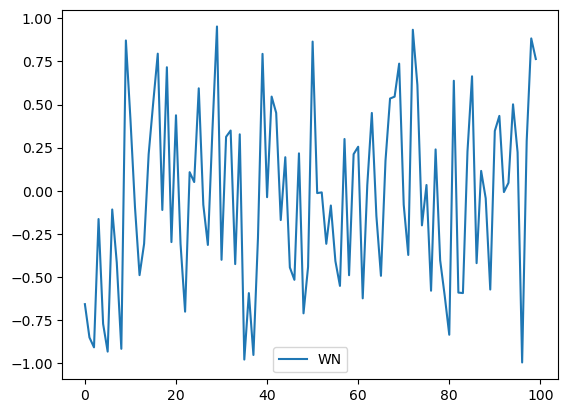

In [9]:
white_noise.plot()

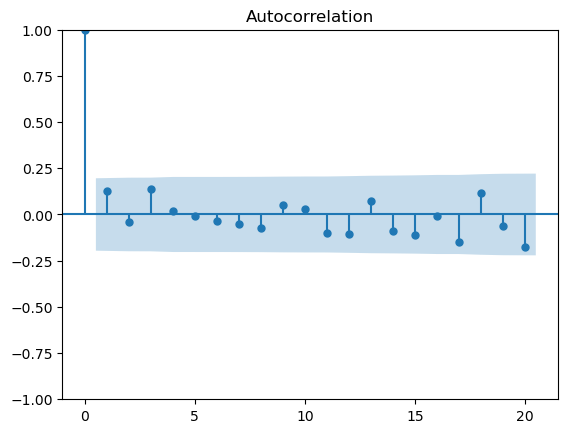

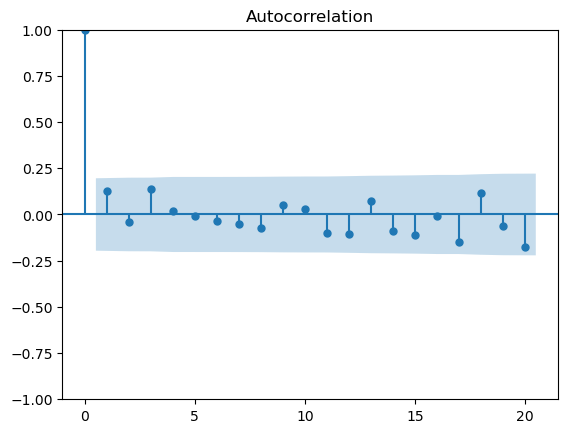

In [10]:
plot_acf(white_noise)

In [11]:
white_noise_series = white_noise.squeeze()

In [12]:
white_noise_series.autocorr(lag=1)

0.12849904622042155

In [13]:
autocorrelations=[]
for i in  range(20):
    lag=white_noise_series.autocorr(lag=i)
    autocorrelations.append(lag)

In [14]:
autocorrelations

[1.0,
 0.12849904622042155,
 -0.03976522863645729,
 0.15121423575495493,
 0.02342461459512664,
 -0.008374473444633544,
 -0.038222073920558555,
 -0.05186545969966301,
 -0.08073354162308667,
 0.06851456217693266,
 0.04261796167065227,
 -0.11511290771141976,
 -0.12286664078495715,
 0.0930794183349751,
 -0.10025211425877878,
 -0.1265589559592832,
 -0.0028385082053525084,
 -0.1848784031106954,
 0.1539072221237219,
 -0.0796756786462294]

In [15]:
autocorrelations=pd.DataFrame(autocorrelations)
autocorrelations.rename(columns = {0:'r'}, inplace = True)

In [16]:
autocorrelations

,r
0,1.000000
1,0.128499
2,-0.039765
3,0.151214
4,0.023425
5,-0.008374
6,-0.038222
7,-0.051865
8,-0.080734
9,0.068515


In [17]:
sm.stats.acorr_ljungbox(autocorrelations, lags=[19], return_df=True)

,lb_stat,lb_pvalue
19,16.124178,0.648977
